# Mushroom Classification

# Goals


1. Run a simple logistic regression
2. Fit a model using random forest classifier
3. Asses the feature importance, and reduce the number of features accordingly
4. Do some visualization
5. Before we fit the model using logistic regression, we will clean and prepare the data first by using one-hot encoder.

# Importing Dataset

At this step, the dataset has been imported from the local machine.

In [231]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
mus = pd.read_csv("C:\\Users\\Chirantan\\Desktop\\tweets\\mushrooms.csv")
mus.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Filtering

Filtering out the dataframe based on edible class 'e'

In [21]:
edi= mus.loc[mus['class'] == 'e']
edi.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


Printing frequency of cap-color of mushroom for edible class.

In [112]:
k=pd.value_counts(edi['cap-color'].values, sort=True)

k

n    1264
g    1032
w     720
e     624
y     400
p      56
b      48
c      32
r      16
u      16
dtype: int64

Storing the frequency of cap-color for entire dataset in order to find out the frequency for poisonous cap-color after subtracting all cap-color from edible cap-color.

In [115]:
v=pd.value_counts(mus['cap-color'].values, sort=True)


In [114]:
g= v-k
g

b     120
c      12
e     876
g     808
n    1020
p      88
r       0
u       0
w     320
y     672
dtype: int64

In [119]:
# Manual array creation after comparing the frequency values between edible and non-edible color-cap of mushrooms
edi_cap= (1264, 1032, 720, 624, 400, 56, 48, 32, 16, 16)
poi_cap= (1020, 808, 320, 876, 672, 88, 120, 12, 0, 0)

# Plotting and Visualization

At this step various features are plotted and visualized in order to compare them against the 2 classes of Mushrooms. Then, it is analyzed in detail for predicting the classes of mushrooms based on its features. 

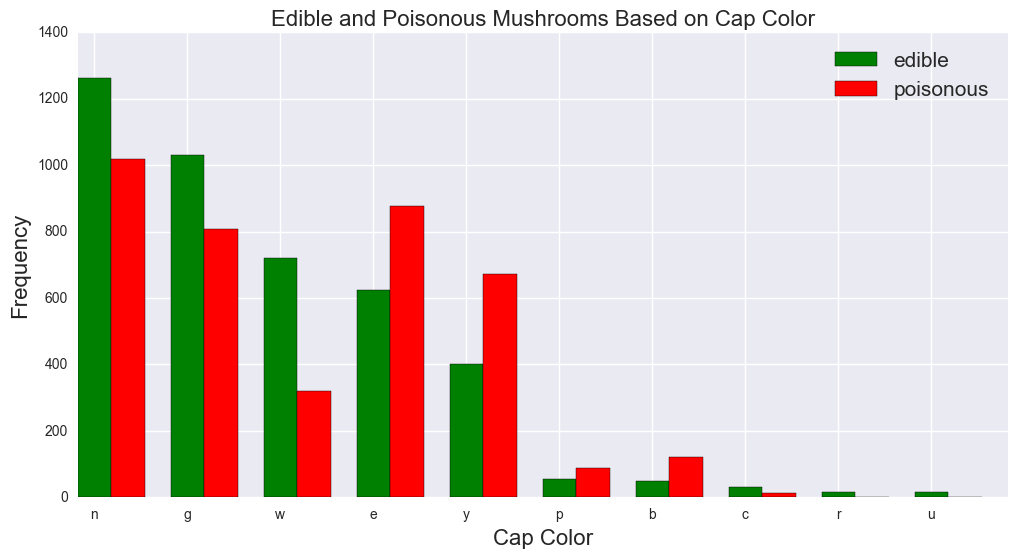

In [163]:
width = 0.36
ind= np.arange(10)
fig, ax = plt.subplots(figsize=(12,6))
edible_bars = ax.bar(ind, edi_cap, width, color='g')
poison_bars = ax.bar(ind + width, poi_cap, width, color='r')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=16)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('n', 'g','w','e','y','p','b','c','r','u'),fontsize = 10)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=15)

C:\Users\Chirantan\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


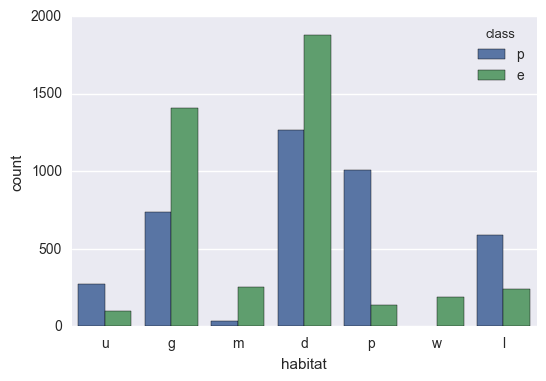

In [164]:
sns.countplot(x="habitat", hue="class", data=mus)

C:\Users\Chirantan\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


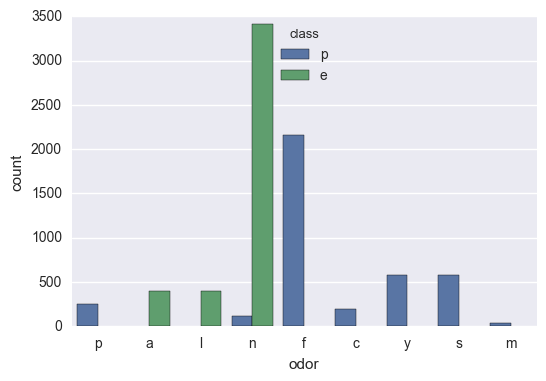

In [165]:
sns.countplot(x="odor", hue="class", data=mus)

C:\Users\Chirantan\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


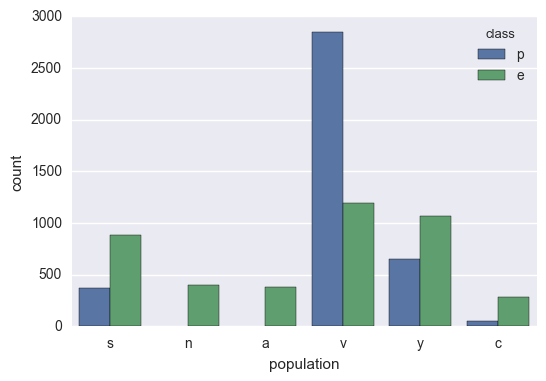

In [166]:
sns.countplot(x="population", hue="class", data=mus)

C:\Users\Chirantan\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


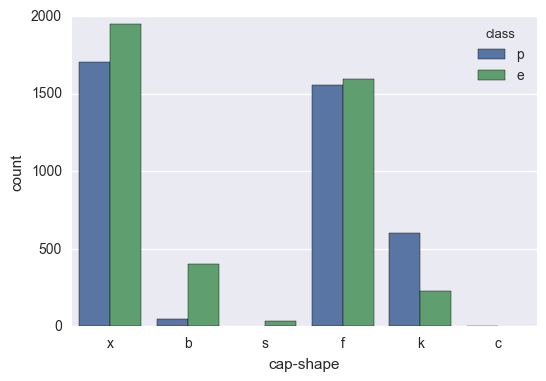

In [167]:
sns.countplot(x="cap-shape", hue="class", data=mus)

C:\Users\Chirantan\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


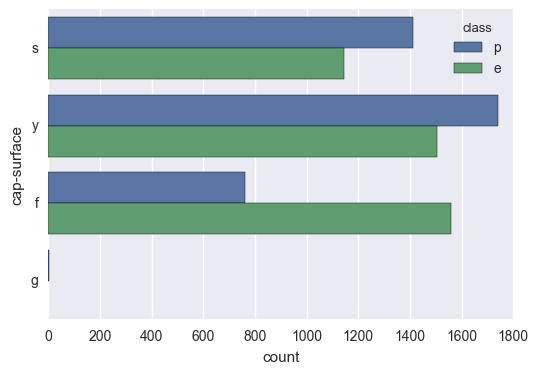

In [170]:
sns.countplot(y="cap-surface", hue="class", data=mus)

In [194]:
mus.shape

(8124, 23)

This is done to make sure that no other missing values are present in any other column. If there were null values,
the sum for the column containing the null value would not be 0.

In [195]:
mus.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [233]:
target = 'class' # The class we want to predict
labels = mus[target]

features = mus.drop(target, axis=1) # Remove the target class from the dataset

In [241]:
labels.head(5)

0    1
1    0
2    0
3    1
4    0
Name: p, dtype: uint8

# Feature transformation

As the dataframe has only categorical features, it cannot be fed directly into sklearn classifiers. The technique to be used in order to achieve that is called One Hot Encoding and it basically add a new binary feature for each value the categorical feature contains.

In pandas we can use the get_dummies function:

In [236]:
categorical = features.columns # Since every fearure is categorical we use features.columns
features = pd.concat([features, pd.get_dummies(features[categorical])], axis=1) # Convert every categorical feature with one hot encoding
features.drop(categorical, axis=1, inplace=True) # Drop the original feature, leave only the encoded ones

labels = pd.get_dummies(labels)['p'] # Encode the target class, 1 is deadly 0 is safe

In [281]:
#This is to verify if all values are in 0 and 1 form so that we can start by training the model. 
# np.unique returns every distinct value present in the features and label dataframe
np.unique(labels.values)

array([0, 1], dtype=uint8)

In [280]:
np.unique(features.values)

array([0, 1], dtype=uint8)

In [239]:
features.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [264]:
''' 
Split the dataset into training and testing, the 70% of the records are in the trainig set
'''
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, random_state=0)

# Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Training Accuracy: %.2f%%' % (lr.score(X_train, y_train)*100))
print('Test Accuracy: %.2f%%' % (lr.score(X_test, y_test)*100))

Training Accuracy: 100.00%
Test Accuracy: 100.00%


Whenever accuracy is at a 100% it is wise to get suspecious. So, different other methods will be used to classify the data. A Random Forest Classifier fits the data into decision trees and tries to classify it according to pre-specified parameters. It will be used

In [272]:
y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr.score(X_test, y_pred)

1.0

In [282]:
# To get the Confusion Matrix
confusion_matrix=metrics.confusion_matrix(y_test,y_pred) 
confusion_matrix

array([[1272,    0],
       [   0, 1166]])

In [274]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [276]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

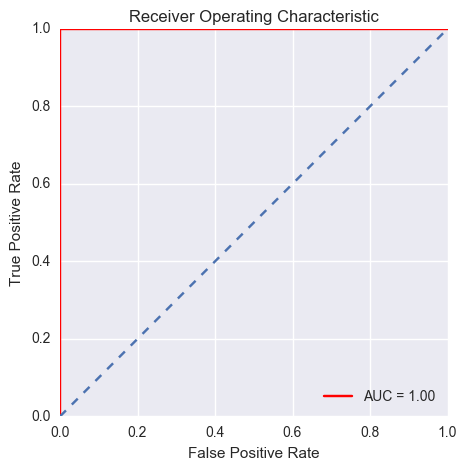

In [278]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
mush1 = pd.read_csv("C:\\Users\\Chirantan\\Desktop\\tweets\\mushrooms.csv")
mush1 = mush1.drop(mush1[mush1['stalk-root']=='?'].index)
mush1[:3]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


# Label Encoder

Here labelEncoder is use to convert all the non numeric values into numeric.

In [250]:
lbe = LabelEncoder()
for feature in mush1.columns[1:]:
    mush1[feature] = lbe.fit_transform(mush1[feature])
mush1[:3]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,e,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,e,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3


In this below cell of code we are splitting the date set since the class feature is the only one that has non-numerical values. So the dataset is split into x which has only the class value and y which has the corresponding charactersitics value for given class value.

In [251]:
y1 = mush1['class'].values
X1 = mush1.drop('class', axis=1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [252]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X1_train, y1_train)
print('Training Score: %.2f%%' % (rfc.score(X1_train, y1_train) * 100))
print('Test Score: %.2f%%' % (rfc.score(X1_test, y1_test) * 100))

Training Score: 100.00%
Test Score: 100.00%


# K-Nearest Neighbors Classifer

In [283]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('K Nearest Neighbors')
print('Training Score: %.2f%%' % (knn.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (knn.score(X_test, y_test) * 100))

K Nearest Neighbors
Training Score: 100.00%
Test Score: 100.00%


# Support Vector Classifer

In [284]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Support Vector Classifer')
print('Training Score: %.2f%%' % (svc.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (svc.score(X_test, y_test) * 100))

Support Vector Classifer
Training Score: 99.89%
Test Score: 99.92%


# Naive-Bayes Classifer

In [286]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Naive-Bayes Classifier')
print('Training Score: %.2f%%' % (gnb.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (gnb.score(X_test, y_test) * 100))

Naive-Bayes Classifier
Training Score: 95.85%
Test Score: 96.31%


# Feature Engineering

Feature engineering is used to identify all the features which are most important to fit the model we are workng on.

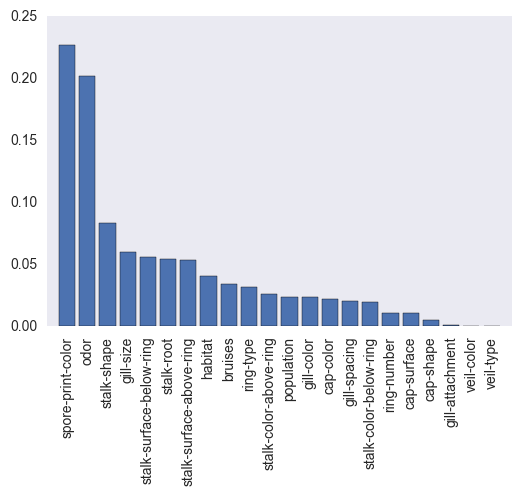

In [254]:
importances = rfc.feature_importances_
feature = mush1.columns[1:]
sort_indices = np.argsort(importances)[::-1]
sorted_feature = []
for idx in sort_indices:
    sorted_feature.append(feature[idx])
plt.figure()
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_feature, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)

Now, looking at the output of the importance function, it is evidant that a lot of datapoints are making a negligable impact on our model, so we have to feature engineer the dateset.

# Results after Feature Engineering

After the feature engineering, Random Forest method has been used to see how feature engineering affected the results.

In [259]:
# random forest
top_feature = sorted_feature[:2]
y = mush1['class'].values
X = mush1[top_feature].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X1_train, y1_train)
print('Random Forest with 2 features')
print('Training Score: %.2f%%' % (rfc.score(X1_train, y1_train) * 100))
print('Test Score: %.2f%%' % (rfc.score(X1_test, y1_test) * 100))

Random Forest with 2 features
Training Score: 100.00%
Test Score: 100.00%


# Conclusion

The Logistic Regression, Random-Forest & KNN-classifier has achieved 100% accuracy with the test set. Hype Parameter tuning is also not needed. 

